In [ ]:
!pip install -q chess==1.10.0 matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

# Helper for game play on Colab

In [ ]:
import numpy as np
import random, chess, chess.svg
import IPython

def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:

        if board.turn == chess.WHITE:
            usermove = input("User move: ")
            if usermove == 'quit':
                break
            # else check whether valid move
            valid_moves = [str(move) for move in board.legal_moves]
            while usermove not in valid_moves:
                print("This is not a valid move, try again!")
                usermove = input("User move: ")
            print("Usermove: ", usermove)
            board.push_san(usermove)
            html_code = chess.svg.board(board=board)
            display(IPython.display.HTML(html_code))
            print("------------")
            print("------------")
            print("------------")
        else: # Ai turn
            aimove = ai_function(board.fen())
            print("AI moves: ", aimove)
            board.push_san(aimove)
            html_code = chess.svg.board(board=board)
            display(IPython.display.HTML(html_code))
            print("------------")
            print("------------")
            print("------------")
    print(board.outcome())

def one_hot_encoding(piece):
    pieces = list('rnbqkpRNBQKP.')
    array = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    array[index] = 1
    return array

square_index = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}

def square_to_idx(square):
    letter = chess.square_name(square)
    return 8 - int(letter[1]), square_index[letter[0]]

def encode_board(board):
    board_str = str(board)
    board_str = board_str.replace(' ','')
    board_list = []

    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
              row_list.append(one_hot_encoding(piece))
        board_list.append(row_list)

    board_list = np.array(board_list)
    # Attack by black piece / white piêc:
    attack_listB = np.zeros((8,13))
    attack_listW = np.zeros((8,13))

    aux = board.turn
    board.turn = chess.WHITE
    for move in board.legal_moves:
      i, j = square_to_idx(move.to_square)
      attack_listB[i][j] = 1
    attack_listB = np.expand_dims(attack_listB, axis=0)

    # board.turn = chess.BLACK
    # for move in board.legal_moves:
    #   i, j = square_to_idx(move.to_square)
    #   attack_listW[i][j] = 1
    # attack_listW = np.expand_dims(attack_listW, axis=0)

    board.turn = aux
    board_list = np.append(board_list, attack_listB, axis=0)
    # board_list = np.append(board_list, attack_listW, axis=0)

    knight_scores = np.array([[0.0, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.0],
                          [0.1, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3, 0.1],
                          [0.2, 0.5, 0.6, 0.65, 0.65, 0.6, 0.5, 0.2],
                          [0.2, 0.55, 0.65, 0.7, 0.7, 0.65, 0.55, 0.2],
                          [0.2, 0.5, 0.65, 0.7, 0.7, 0.65, 0.5, 0.2],
                          [0.2, 0.55, 0.6, 0.65, 0.65, 0.6, 0.55, 0.2],
                          [0.1, 0.3, 0.5, 0.55, 0.55, 0.5, 0.3, 0.1],
                          [0.0, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.0]]) * 0.3

# Mở rộng ma trận thành kích thước (8, 13) bằng cách thêm các cột chứa giá trị 0
    knight_scores = knight_scores[::-1, :]
    knight_scores_extended = np.pad(knight_scores, ((0, 0), (0, 5)), 'constant')

# Lật ngược bảng bằng cách đảo ngược thứ tự của các cột


    bishop_scores = np.array([[0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0],
                              [0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2],
                              [0.2, 0.4, 0.5, 0.6, 0.6, 0.5, 0.4, 0.2],
                              [0.2, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.2],
                              [0.2, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.2],
                              [0.2, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.2],
                              [0.2, 0.5, 0.4, 0.4, 0.4, 0.4, 0.5, 0.2],
                              [0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0]]) * 0.3

    # Mở rộng ma trận thành kích thước (8, 13) bằng cách thêm các cột chứa giá trị 0
    bishop_scores = bishop_scores[::-1, :]
    bishop_scores_extended = np.pad(bishop_scores, ((0, 0), (2, 3)), 'constant')

    rook_scores = np.array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
                        [0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5],
                        [0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0],
                        [0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0],
                        [0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0],
                        [0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0],
                        [0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0],
                        [0.25, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 0.25]]) * 0.5

# Mở rộng ma trận thành kích thước (8, 13) bằng cách thêm các cột chứa giá trị 0
    rook_scores = rook_scores[::-1, :]
    rook_scores_extended = np.pad(rook_scores, ((0, 0), (2, 3)), 'constant')
    queen_scores = np.array([[0.0, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 0.0],
                         [0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2],
                         [0.2, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.2],
                         [0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.3],
                         [0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.3],
                         [0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.2],
                         [0.2, 0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.2],
                         [0.0, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 0.0]]) *0.9

# Mở rộng ma trận thành kích thước (8, 13) bằng cách thêm các cột chứa giá trị 0
    queen_scores = queen_scores[::-1, :]
    queen_scores_extended = np.pad(queen_scores, ((0, 0), (2, 3)), 'constant')

    pawn_scores = np.array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
               [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
               [0.3, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.3],
               [0.25, 0.25, 0.3, 0.45, 0.45, 0.3, 0.25, 0.25],
               [0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2],
               [0.25, 0.15, 0.1, 0.2, 0.2, 0.1, 0.15, 0.25],
               [0.25, 0.3, 0.3, 0.0, 0.0, 0.3, 0.3, 0.25],
               [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]])
    pawn_scores = pawn_scores[::-1, :]
    pawn_scores_extended = np.pad(pawn_scores, ((0, 0), (2, 3)), 'constant')

    rook_scores_extended = np.expand_dims(rook_scores_extended, axis=0)
    knight_scores_extended = np.expand_dims(knight_scores_extended, axis=0)
    bishop_scores_extended = np.expand_dims(bishop_scores_extended, axis=0)
    queen_scores_extended = np.expand_dims(queen_scores_extended, axis=0)
    pawn_scores_extended = np.expand_dims(pawn_scores_extended, axis=0)

    board_list = np.append(board_list, rook_scores_extended, axis=0)
    board_list = np.append(board_list, knight_scores_extended, axis=0)
    board_list = np.append(board_list, bishop_scores_extended, axis=0)
    board_list = np.append(board_list, queen_scores_extended, axis=0)
    board_list = np.append(board_list, pawn_scores_extended, axis=0)
    return board_list


In [ ]:
encode_board(chess.Board()).shape

(14, 8, 13)

# 1. PANDAS PROCESSING

In [ ]:
import pandas as pd

train_df = pd.read_csv("sample_data/train.csv", index_col='id')
train_df.head()

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6


In [ ]:
def encode_fen_string(fen_str):
    board = chess.Board(fen_str)
    return encode_board(board)

def count_material(fen):
    material_dict = {
        'p': 1, 'b': 3, 'n': 3, 'r': 5, 'q': 9
    }

    count = 0
    for char in fen.lower():
        if char in material_dict.keys():
            count += material_dict[char]
    return count

train_df['total_material'] = train_df['board'].apply(count_material)

In [ ]:
# Opening
opening_df = train_df[train_df['total_material'] > 60]
open_train_df = opening_df[:-1000]
open_val_df = opening_df[-1000:]
# Midgame & endgame
mid_df = train_df[(train_df['total_material'] >= 30)
  & (train_df['total_material'] <= 60)]
mid_train_df = mid_df[:-1000]
mid_val_df = mid_df[-1000:]

# Midgame & endgame
end_df = train_df[train_df['total_material'] < 30]
end_train_df = end_df[:-1000]
end_val_df = end_df[-1000:]

# 2. BUILDING MODEL

## a. Opening

In [ ]:
def scale_to_10(number, max_value):
    scaled_value = number / max_value * 10
    rounded_scaled_value = round(scaled_value, 3)  # Làm tròn đến 3 chữ số thập phân
    return rounded_scaled_value

In [ ]:
X_Otrain = np.stack(open_train_df['board'].apply(encode_fen_string))
# Y_Otrain = open_train_df['black_score']
max_value = opening_df['black_score'].max()
Y_Otrain = open_train_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

X_Oval = np.stack(open_val_df['board'].apply(encode_fen_string))
#  = open_val_df['black_score']
Y_Oval = open_val_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

In [ ]:
from keras import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model

open_model = Sequential([
            Input(shape=(15 ,8, 13)),
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.25),
            Flatten(),
            Dense(80, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(1, activation='linear')])
open_model.compile(optimizer=Adam(learning_rate=0.03), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
open_history = open_model.fit(X_Otrain, Y_Otrain, epochs=100, validation_data=(X_Oval, Y_Oval), callbacks=[early_stopping, reduce_lr], batch_size=64)

Exception ignored in: <function _xla_gc_callback at 0x7957eb0ae4d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 2.0995 - val_loss: 5.5424 - learning_rate: 0.0300
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 1.3082 - val_loss: 1.5315 - learning_rate: 0.0300
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 1.0056 - val_loss: 3.2620 - learning_rate: 0.0300
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.8423 - val_loss: 0.7844 - learning_rate: 0.0300
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.7395 - val_loss: 0.7618 - learning_rate: 0.0300
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 0.6765 - val_loss: 0.9610 - learning_rate: 0.0300
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.6388 - val_loss: 0.5222 - learning_rate: 0.0300
Epoch 8/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.5750 - val_loss: 0.4859 - learning_rate: 0.0300
Epoch 9/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.5669 - val_loss: 0.7324 - learn

In [ ]:
open_model.save('open_model2.keras')

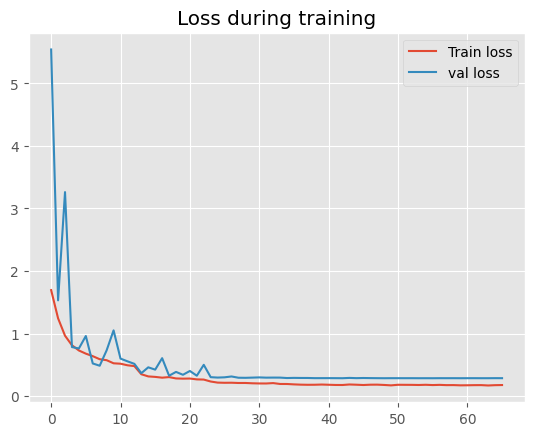

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(open_history.history['loss'], label='Train loss')
plt.plot(open_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss during training')
plt.show()

## b. From mid to last

In [ ]:
def scale_to_10(number, max_value):
    scaled_value = number / max_value * 10
    rounded_scaled_value = round(scaled_value, 3)  # Làm tròn đến 3 chữ số thập phân
    return rounded_scaled_value

In [ ]:
X_Mtrain = np.stack(mid_train_df['board'].apply(encode_fen_string))
# Y_Mtrain = mid_train_df['black_score']
max_value = mid_df['black_score'].max()
Y_Mtrain = mid_train_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

X_Mval = np.stack(mid_val_df['board'].apply(encode_fen_string))
# Y_Mval = mid_val_df['black_score']
Y_Mval = mid_val_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

In [ ]:
from keras import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

mid_model = Sequential([
            Input(shape=(14, 8, 13)),
            Conv2D(40, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(40, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Conv2D(40, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.25),
            Flatten(),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(1)])
mid_model.compile(optimizer=Adam(learning_rate=0.05), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
mid_history = mid_model.fit(X_Mtrain, Y_Mtrain, epochs=100, validation_data=(X_Mval, Y_Mval), callbacks=[early_stopping, reduce_lr], batch_size=64)

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 1.3316 - val_loss: 0.9946 - learning_rate: 0.0500
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.7796 - val_loss: 0.7361 - learning_rate: 0.0500
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.7093 - val_loss: 0.5848 - learning_rate: 0.0500
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.6258 - val_loss: 0.9398 - learning_rate: 0.0500
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.7381 - val_loss: 0.7108 - learning_rate: 0.0500
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.6392 - val_loss: 0.5254 - learning_rate: 0.0500
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.5368 - val_loss: 1.6426 - learning_rate: 0.0500
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.5010 - val_loss: 0.4759 - learning_rate: 0.0500
Epoch 9/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.4762 - val_loss: 0.6175 - learning_

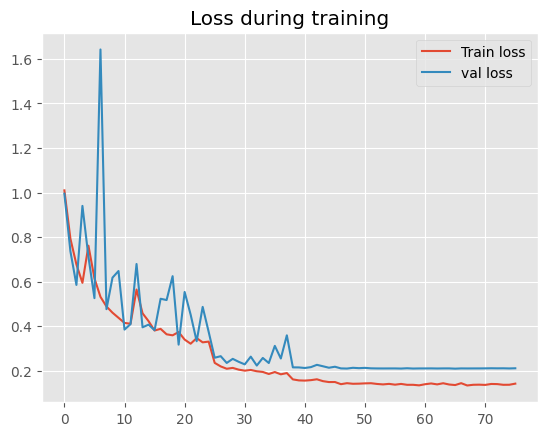

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(mid_history.history['loss'], label='Train loss')
plt.plot(mid_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss during training')
plt.show()

In [ ]:
mid_model.save('mid_model.keras')

In [ ]:
X_Etrain = np.stack(end_train_df['board'].apply(encode_fen_string))
# Y_Mtrain = mid_train_df['black_score']
max_value = end_df['black_score'].max()
Y_Etrain = end_train_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

X_Eval = np.stack(end_val_df['board'].apply(encode_fen_string))
# Y_Mval = mid_val_df['black_score']
Y_Eval = end_val_df['black_score'].apply(lambda x: scale_to_10(x, max_value))

In [ ]:
X_Etrain.shape

(24131, 14, 8, 13)

In [ ]:
from keras import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

end_model = Sequential([
            Input(shape=(14, 8, 13)),
            Conv2D(32, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(32, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Conv2D(32, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Conv2D(32, (3, 3), padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            Flatten(),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(1, activation='linear')])
end_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
end_history = end_model.fit(X_Etrain, Y_Etrain, epochs=100, validation_data=(X_Eval, Y_Eval), callbacks=[early_stopping, reduce_lr], batch_size=64)

Epoch 1/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 1.1885 - val_loss: 1.2400 - learning_rate: 0.0100
Epoch 2/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 0.9250 - val_loss: 1.0628 - learning_rate: 0.0100
Epoch 3/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.8629 - val_loss: 0.8328 - learning_rate: 0.0100
Epoch 4/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.8307 - val_loss: 1.8323 - learning_rate: 0.0100
Epoch 5/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.9404 - val_loss: 0.8534 - learning_rate: 0.0100
Epoch 6/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.8188 - val_loss: 0.9020 - learning_rate: 0.0100
Epoch 7/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.7769 - val_loss: 0.7892 - learning_rate: 0.0100
Epoch 8/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.8155 - val_loss: 0.7345 - learning_rate: 0.0100
Epoch 9/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.7809 - val_loss: 0.7132 - learn

In [ ]:
end_model.save('end_model.keras')

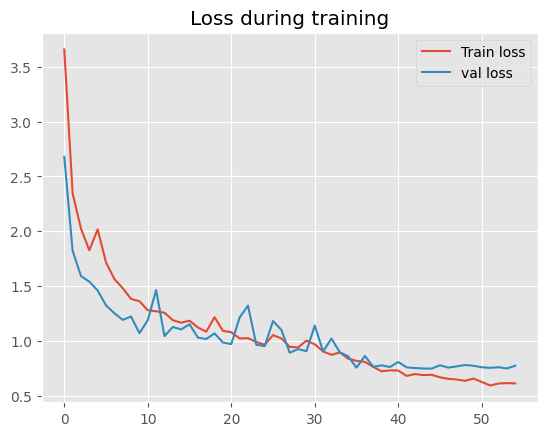

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(end_history.history['loss'], label='Train loss')
plt.plot(end_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss during training')
plt.show()

# 3. SIMULATING GAME

In [ ]:
from keras.models import load_model

opener_model = load_model("open_model_new.keras")
mider_model = load_model("mid_model_new.keras")

In [ ]:
def play_nn(fen, show_move_evaluations=False):
    board = chess.Board(fen)

    total_material = count_material(fen)

    if total_material > 60:
        model = opener_model
    else:
        model = mider_model

    # Evaluate all legal moves
    moves = []
    input_vectors = []

    for legal_move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(legal_move)
        moves.append(legal_move)
        input_vectors.append(encode_board(candidate_board).astype(np.int32).flatten())

    input_vector = np.stack(input_vectors)
    # Run fail shape input vector if load from keras model
    # To fix, reshape it
    n_moves = input_vector.shape[0]
    input_vector = input_vector.reshape((n_moves, 10, 8, 13))

    scores = model.predict(input_vector, verbose=0)
    # print(scores)

    if board.turn == chess.BLACK:
        index_of_bestmove = np.argmax(scores)
    else:
        index_of_bestmove = np.argmax(-scores)

    if show_move_evaluations:
        print(zip(scores, moves))

    best_move = moves[index_of_bestmove]
    print("Best move: ", str(best_move))
    return str(best_move)

In [ ]:
play_game(play_nn)

NameError: name 'play_nn' is not defined